Windy Gridworld with King’s Moves (programming) Re-solve the windy
gridworld assuming eight possible actions, including the diagonal moves, rather than four.
How much better can you do with the extra actions? Can you do even better by including
a ninth action that causes no movement at all other than that caused by the wind?

In [25]:
import numpy as np
import matplotlib.pyplot as plt

ROWS = 7
COLS = 10
T_STATE = (3, 7)
WIND_STRENGTH = {
    0: 0,
    1: 0,
    2: 0,
    3: 1,
    4: 1,
    5: 1,
    6: 2,
    7: 2,
    8: 1,
    9: 0
}

def get_next_state_and_reward(state, action):
    row, col = state
    if action == "left":
        new_pos = (row, col - 1)
    elif action == "right":
        new_pos = (row, col + 1)
    elif action == "up":
        new_pos = (row - 1, col)
    elif action == "down":
        new_pos = (row + 1, col)
    elif action == "up_left":
        new_pos = (row - 1, col - 1)
    elif action == "up_right":
        new_pos = (row - 1, col + 1)
    elif action == "down_left":
        new_pos = (row + 1, col - 1)
    elif action == "down_right":
        new_pos = (row + 1, col + 1)
    elif action == "stay":
        new_pos = (row, col)
    # Apply wind effect and boundary constraints
    wind_affected_row = new_pos[0] - WIND_STRENGTH[new_pos[1]]
    final_row = max(0, min(ROWS - 1, wind_affected_row))
    final_col = max(0, min(COLS - 1, new_pos[1]))
    new_pos = (final_row, final_col)

    if new_pos == T_STATE:
        reward = 0
    else:
        reward = -1

    return new_pos, reward

def get_next_action(state, action_values, epsilon=0.1):
    available_actions = []
    if state[0] > 0:
        available_actions.append("up")
    if state[0] < ROWS - 1:
        available_actions.append("down")
    if state[1] > 0:
        available_actions.append("left")
    if state[1] < COLS - 1:
        available_actions.append("right")
    if state[0] > 0 and state[1] > 0:
        available_actions.append("up_left")
    if state[0] > 0 and state[1] < COLS - 1:
        available_actions.append("up_right")
    if state[0] < ROWS - 1 and state[1] > 0:
        available_actions.append("down_left")
    if state[0] < ROWS - 1 and state[1] < COLS - 1:
        available_actions.append("down_right")
    available_actions.append("stay")

    if np.random.random() < epsilon:
        return np.random.choice(available_actions)
    else:
        return max(available_actions, key=lambda action: action_values[state[0]][state[1]][action])

INITIAL_STATE_ACTION_VALUES = [[{
    "left": 0,
    "right": 0,
    "up": 0,
    "down": 0,
    "up_left": 0,
    "up_right": 0,
    "down_left": 0,
    "down_right": 0,
    "stay": 0
} for _ in range(10)] for _ in range(7)]

In [26]:
import copy

def train_sarsa(
    initial_state_action_values,
    alpha=0.5,
    epsilon=0.1,
    episodes=200,
    decay_steps=None
):
    state_action_values = copy.deepcopy(initial_state_action_values)
    step_episodes = []
    for i in range(episodes):
        state = (3, 0)
        action = get_next_action(state, state_action_values, get_epsilon(i, initial_eps=epsilon, final_eps=0.001, decay_steps=150) if decay_steps else epsilon)
        while state != T_STATE:
            step_episodes.append(i)
            next_state, reward = get_next_state_and_reward(state, action)
            next_action = get_next_action(next_state, state_action_values, get_epsilon(i, initial_eps=epsilon, final_eps=0.001, decay_steps=150) if decay_steps else epsilon)
            state_action_values[state[0]][state[1]][action] += alpha * (reward + state_action_values[next_state[0]][next_state[1]][next_action] - state_action_values[state[0]][state[1]][action])
            state = next_state
            action = next_action

    return state_action_values, step_episodes

def get_epsilon(episode, initial_eps=.1, final_eps=0.001, decay_steps=150):
    if episode >= decay_steps:
        return final_eps
    return initial_eps - (initial_eps - final_eps) * (episode / decay_steps)

def generate_episode(state_action_values, epsilon=0.1):
    state = (3, 0)
    episode = [state]
    while state != T_STATE:
        action = get_next_action(state, state_action_values, epsilon)
        state, reward = get_next_state_and_reward(state, action)
        episode.append(state)
    
    return episode

def plot_episode(state_action_values, epsilon=0.1):
    episode_path = generate_episode(state_action_values, epsilon)
    print(len(episode_path))

    cols = [pos[1] for pos in episode_path]
    rows = [pos[0] for pos in episode_path]

    # Simple plot with dots
    plt.figure(figsize=(12, 8))
    plt.plot(cols, rows, 'o-', markersize=8, linewidth=2, label='Episode path')
    
    # Mark start and goal states
    plt.plot(0, 3, 's', markersize=12, color='green', label='Start (3,0)')
    plt.plot(7, 3, '*', markersize=15, color='red', label='Goal (3,7)')
    
    plt.xlim(-0.5, COLS - 0.5)  # 0 to 9 for columns
    plt.ylim(-0.5, ROWS - 0.5)  # 0 to 6 for rows
    
    # Add grid and formatting
    plt.grid(True, alpha=0.3)
    plt.gca().invert_yaxis()  # Flip y-axis so row 0 is at top
    
    # Add axis labels and title
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    
    # Set integer ticks for better grid visualization
    plt.xticks(range(COLS))
    plt.yticks(range(ROWS))
    
    plt.tight_layout()
    plt.show()

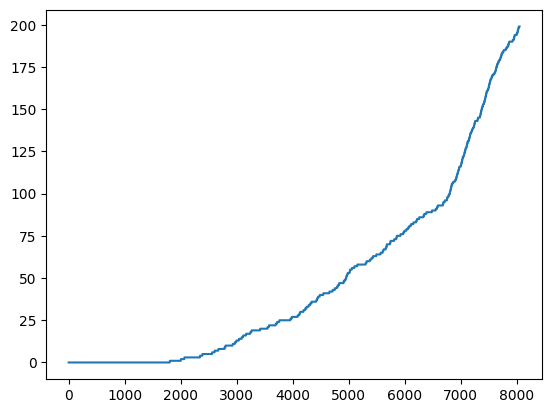

In [27]:
state_action_values, step_episodes = train_sarsa(
    INITIAL_STATE_ACTION_VALUES,
    alpha=0.5,
    epsilon=0.1,
    episodes=200
)

plt.plot(step_episodes)
plt.show()

16


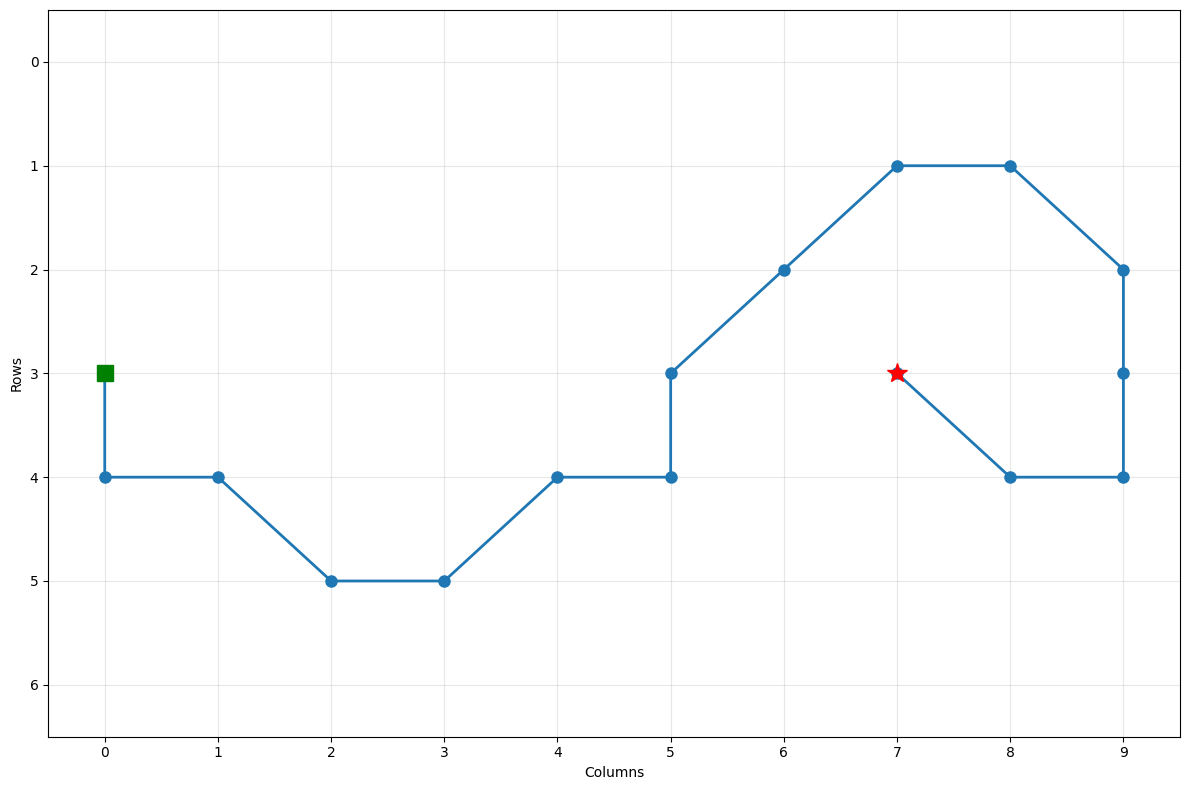

9


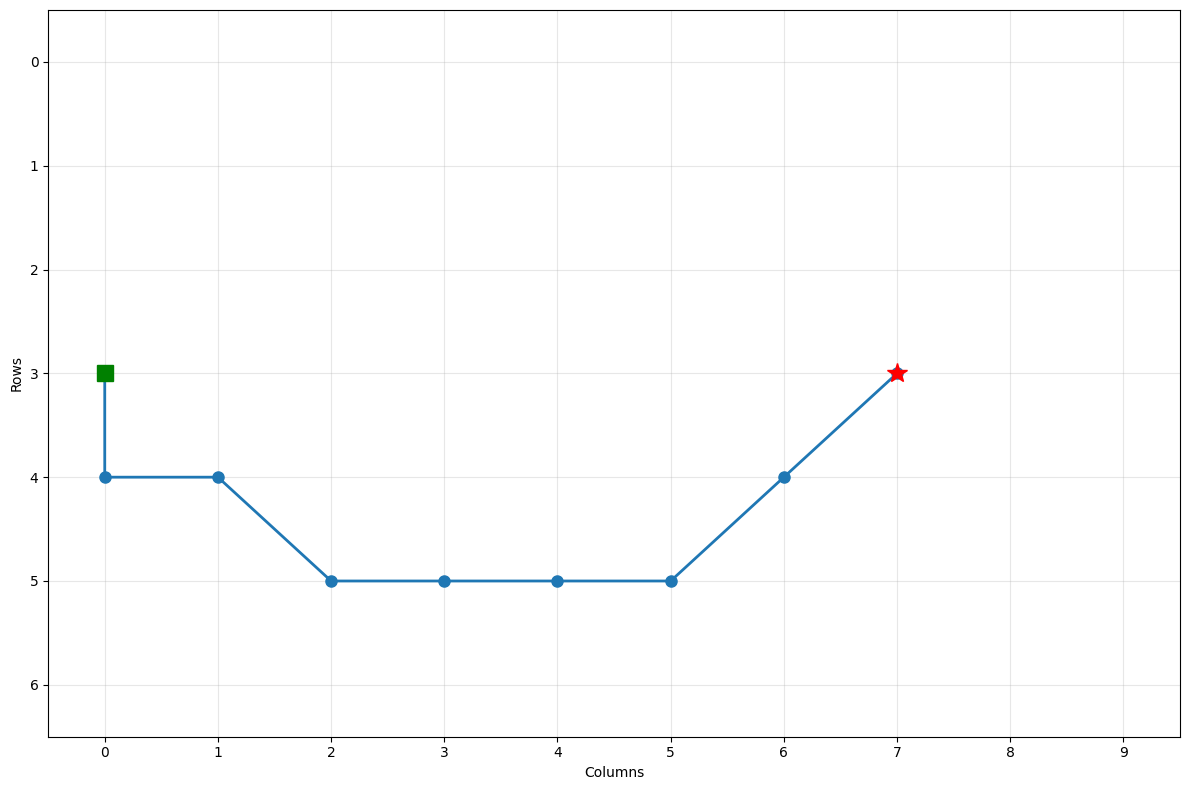

In [28]:
plot_episode(state_action_values, epsilon=0.1)
plot_episode(state_action_values, epsilon=0.00001)

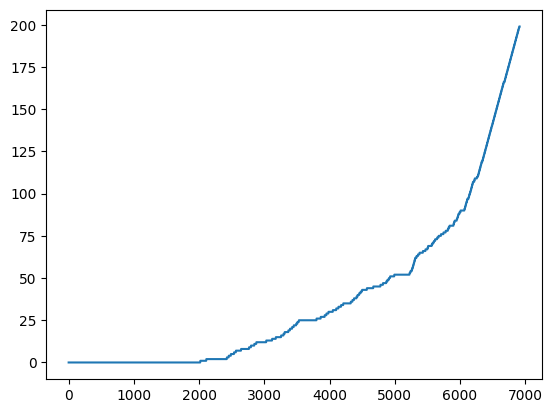

In [29]:
state_action_values, step_episodes = train_sarsa(
    INITIAL_STATE_ACTION_VALUES,
    alpha=0.5,
    epsilon=0.1,
    episodes=200,
    decay_steps=150
)

plt.plot(step_episodes)
plt.show()

22


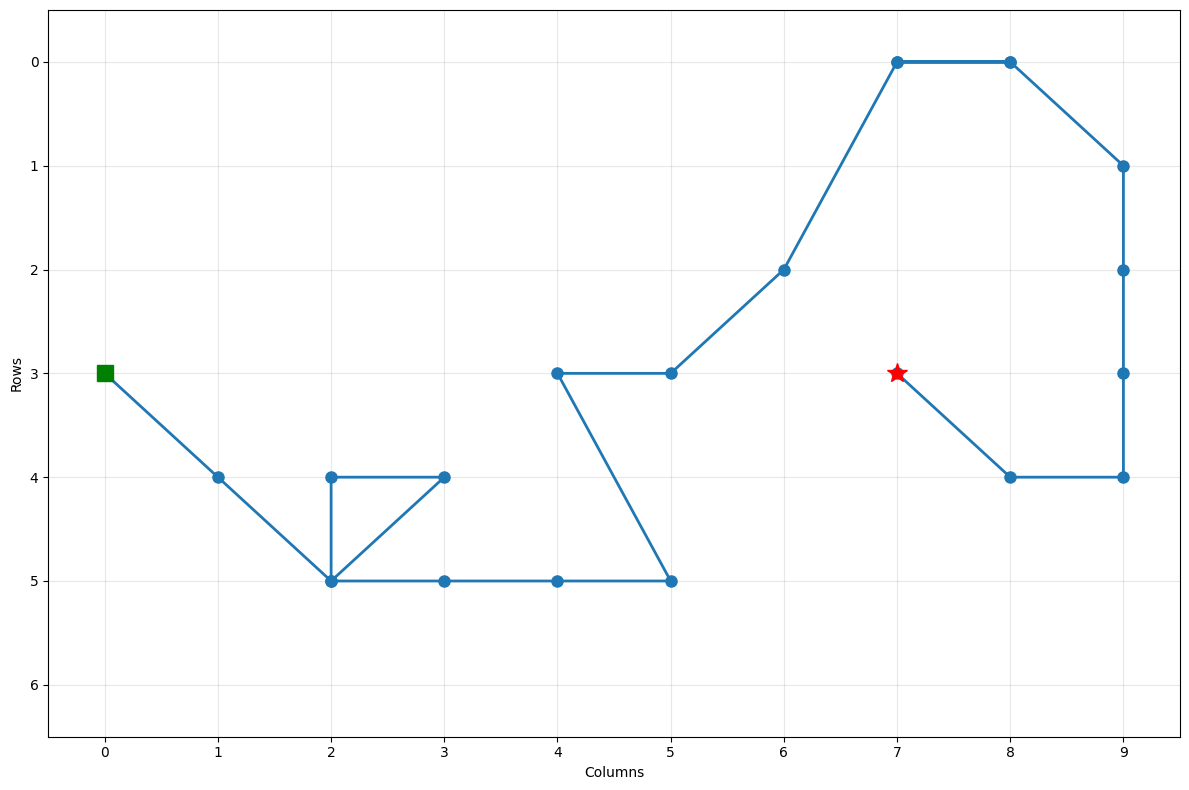

8


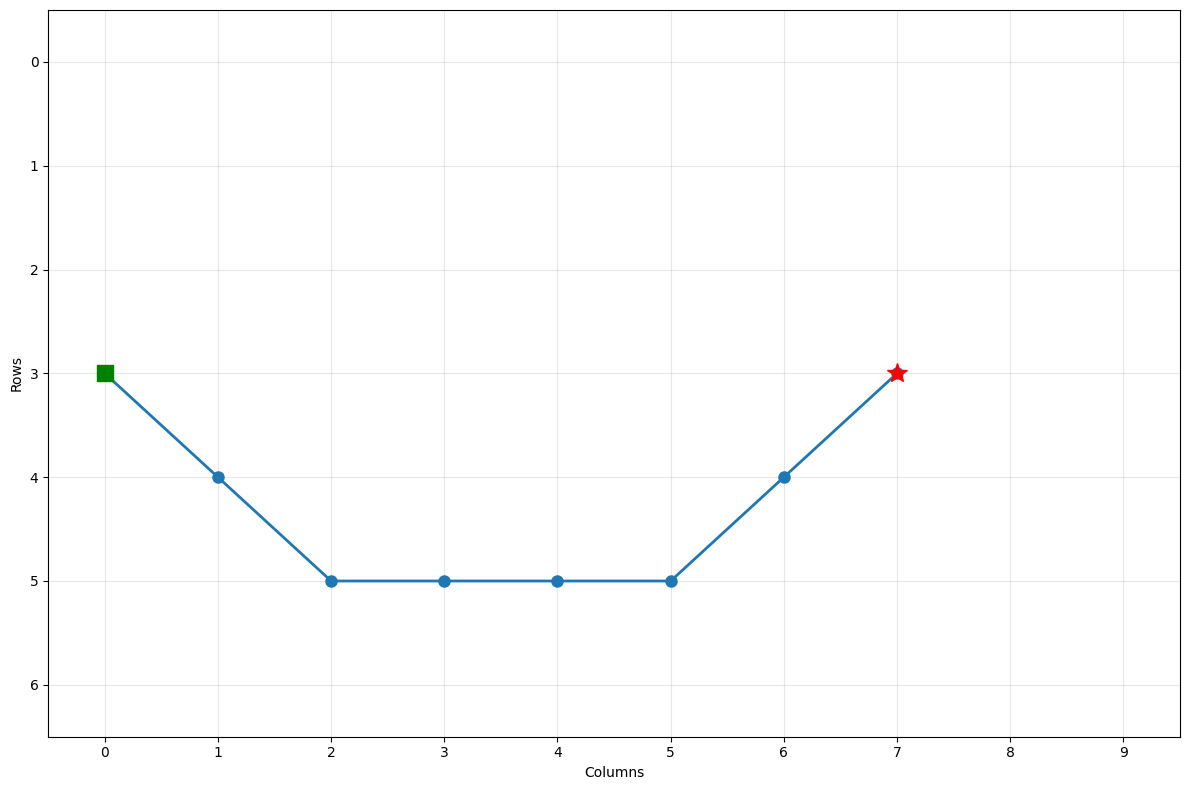

In [30]:
plot_episode(state_action_values, epsilon=0.1)
plot_episode(state_action_values, epsilon=0.00001)